# TP 3

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy.linalg

In [3]:
#constantes

T=1
nb_mes = 100
simga_mes = 1*math.pi/180
vitesse_observateur = 10

position_initiale = [2000,2000]
cap_emmeteur = phi = -20*math.pi/180
vitesse_emmeteur = 10

matrice_transition = np.array([[1,0,T,0],[0,1,0,T],[0,0,1,0],[0,0,0,1]])
inverse = np.linalg.inv(matrice_transition)
P0 = np.diag((1000,1000,10,10))**2
J_init = np.linalg.inv(P0)

In [4]:

from random import randrange


def dynamique_observateur(phi,T,nb_mes,vitesse_observateur):
    X=np.zeros((nb_mes,2))
    for i in range(1,int(nb_mes/2)):
        X[i]=X[i-1]+vitesse_observateur*T*np.array([1,0])
    for i in range(int(nb_mes/2),nb_mes):
        X[i]=X[i-1]+vitesse_observateur*T*np.array([math.cos(phi),math.sin(phi)])
    return(X)

def dynamique_emmeteur(position_initiale, nb_mes,cap_emmeteur,vitesse_emmeteur):
    Y= np.zeros((nb_mes,2))
    Y[0] = position_initiale
    for i in range(1,nb_mes):
        Y[i] = Y[i-1]+ vitesse_emmeteur*T*np.array([math.cos(cap_emmeteur),math.sin(cap_emmeteur)])
    return(Y)

def gradient_hk_Xk(X,Y):
    assert np.shape(X) == np.shape(Y)
    nb_mes, _ = np.shape(X)
    gradient = np.zeros((nb_mes,4))
    for i in range(nb_mes):
        delta_y_k = Y[i,0] -X[i,0] #emmeteur - observateur
        delta_x_k = Y[i,1]-X[i,1]
        gradient[i,0]= -(delta_y_k)/( (1+( delta_y_k/delta_x_k )**2)*(delta_x_k)**2 )
        gradient[i,1] = 1/( (delta_x_k)*(1+ (delta_y_k/delta_x_k)**2) )
    return(gradient)

def J(X,Y,J0,simga_mes,inverse):
    gradient = gradient_hk_Xk(X,Y)
    nb_mes,_ = np.shape(X)
    valeurs_J =  np.zeros((nb_mes,4,4))
    valeurs_J[0] = J0
    for i in range(1,nb_mes):
        grad = np.array([gradient[i]])
        produit_hk_hk_T = np.dot(grad.T,grad)
        phi_inv_J_k_1 = np.dot(inverse.T,valeurs_J[i-1])
        valeurs_J[i]= (1/simga_mes**2)*produit_hk_hk_T + np.dot(phi_inv_J_k_1,inverse)
    return(valeurs_J)

def borne_cramer_rao(X,Y,J0,simga_mes,inverse):
    valeurs_J = J(X,Y,J0,simga_mes,inverse)
    cramer_rao = np.zeros((nb_mes,2))
    for i in range(nb_mes):
        BCR = np.linalg.inv(valeurs_J[i])
        cramer_rao[i,0] = np.sqrt(BCR[0,0])
        cramer_rao[i,1] = np.sqrt(BCR[1,1])
    return(cramer_rao)

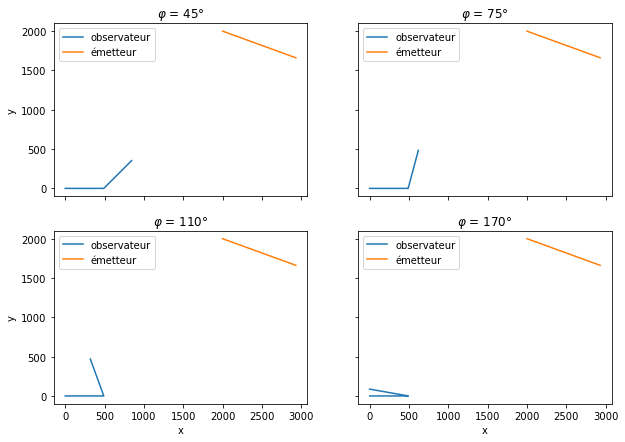

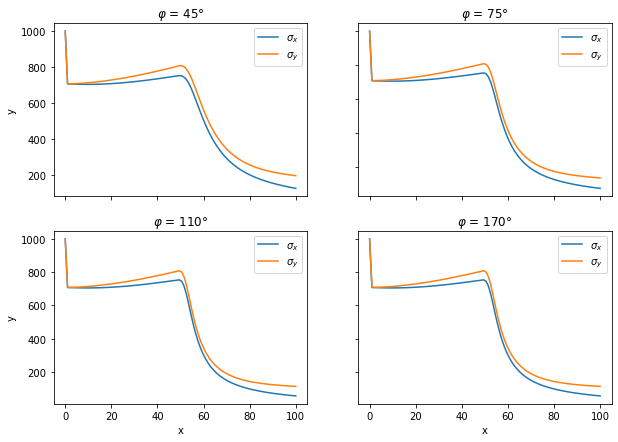

In [5]:
cap_emmeteur = -20*math.pi/180

phi1 = 45*math.pi/180
X1 = dynamique_observateur(phi1,T,nb_mes,vitesse_observateur)
Y1 = dynamique_emmeteur(position_initiale, nb_mes,cap_emmeteur,vitesse_emmeteur)
valeurs_J1 = J(X1,Y1,J_init,simga_mes,inverse)
cramer_rao1 = borne_cramer_rao(X1,Y1,J_init,simga_mes,inverse)

phi2 = 75*math.pi/180
X2 = dynamique_observateur(phi2,T,nb_mes,vitesse_observateur)
Y2 = dynamique_emmeteur(position_initiale, nb_mes,cap_emmeteur,vitesse_emmeteur)
valeurs_J2 = J(X2,Y2,J_init,simga_mes,inverse)
cramer_rao2 = borne_cramer_rao(X2,Y2,J_init,simga_mes,inverse)

phi3 = 110*math.pi/180
X3 = dynamique_observateur(phi3,T,nb_mes,vitesse_observateur)
Y3 = dynamique_emmeteur(position_initiale, nb_mes,cap_emmeteur,vitesse_emmeteur)
valeurs_J3 = J(X3,Y3,J_init,simga_mes,inverse)
cramer_rao3 = borne_cramer_rao(X3,Y3,J_init,simga_mes,inverse)

phi4 = 170*math.pi/180
X4 = dynamique_observateur(phi4,T,nb_mes,vitesse_observateur)
Y4 = dynamique_emmeteur(position_initiale, nb_mes,cap_emmeteur,vitesse_emmeteur)
valeurs_J4 = J(X4,Y4,J_init,simga_mes,inverse)
cramer_rao4 = borne_cramer_rao(X4,Y4,J_init,simga_mes,inverse)


fig, ax = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(10)
ax[0,0].plot(X1[:,0],X1[:,1])
ax[0,0].plot(Y1[:,0],Y1[:,1])
ax[0,0].legend(['observateur','émetteur'])
ax[0,0].set_title('$ \\varphi$ = 45°')
ax[0,1].plot(X2[:,0],X2[:,1])
ax[0,1].plot(Y2[:,0],Y2[:,1])
ax[0,1].legend(['observateur','émetteur'])
ax[0,1].set_title('$ \\varphi$ = 75°')
ax[1,0].plot(X3[:,0],X3[:,1])
ax[1,0].plot(Y3[:,0],Y3[:,1])
ax[1,0].legend(['observateur','émetteur'])
ax[1,0].set_title('$ \\varphi$ = 110°')
ax[1,1].plot(X4[:,0],X4[:,1])
ax[1,1].plot(Y4[:,0],Y4[:,1])
ax[1,1].legend(['observateur','émetteur'])
ax[1,1].set_title('$ \\varphi$ = 170°')

for a in ax.flat:
    a.set(xlabel='x', ylabel='y')

for a in ax.flat:
    a.label_outer()
plt.show()

absc = np.linspace(0,100,100)

fig, ax = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(10)
ax[0,0].plot(absc,cramer_rao1[:,0])
ax[0,0].plot(absc,cramer_rao1[:,1])
ax[0,0].legend(['$\sigma_{x}$','$\sigma_{y}$'])
ax[0,0].set_title('$ \\varphi$ = 45°')
ax[0,1].plot(absc,cramer_rao2[:,0])
ax[0,1].plot(absc,cramer_rao2[:,1])
ax[0,1].legend(['$\sigma_{x}$','$\sigma_{y}$'])
ax[0,1].set_title('$ \\varphi$ = 75°')
ax[1,0].plot(absc,cramer_rao3[:,0])
ax[1,0].plot(absc,cramer_rao3[:,1])
ax[1,0].legend(['$\sigma_{x}$','$\sigma_{y}$'])
ax[1,0].set_title('$ \\varphi$ = 110°')
ax[1,1].plot(absc,cramer_rao3[:,0])
ax[1,1].plot(absc,cramer_rao3[:,1])
ax[1,1].legend(['$\sigma_{x}$','$\sigma_{y}$'])
ax[1,1].set_title('$ \\varphi$ = 170°')

for a in ax.flat:
    a.set(xlabel='x', ylabel='y')

for a in ax.flat:
    a.label_outer()
plt.show()



# plt.plot(absc,cramer_rao[:,0])
# plt.plot(absc,cramer_rao[:,1])

# print("sigma_x = ", cramer_rao[-1,0])
# print("sigma_y =", cramer_rao[-1,1])
# print("critère : ",np.sqrt(cramer_rao[-1,0]**2+cramer_rao[-1,1]**2))


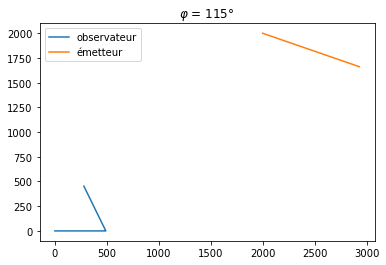

sigma_x =  57.50261911862237
sigma_y = 114.5915181558474
critère :  128.20985624655876


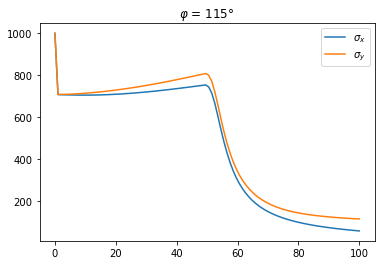

In [6]:
phi = 115*math.pi/180
X = dynamique_observateur(phi,T,nb_mes,vitesse_observateur)
Y = dynamique_emmeteur(position_initiale, nb_mes,cap_emmeteur,vitesse_emmeteur)
valeurs_J = J(X,Y,J_init,simga_mes,inverse)
cramer_rao = borne_cramer_rao(X,Y,J_init,simga_mes,inverse)

plt.plot(X[:,0],X[:,1])
plt.plot(Y[:,0],Y[:,1])
plt.legend(['observateur','émetteur'])
plt.title('$ \\varphi$ = 115°')
plt.show()

plt.plot(absc,cramer_rao[:,0])
plt.plot(absc,cramer_rao[:,1])
plt.legend(['$\sigma_{x}$','$\sigma_{y}$'])
plt.title('$ \\varphi$ = 115°')

print("sigma_x = ", cramer_rao[-1,0])
print("sigma_y =", cramer_rao[-1,1])
print("critère : ",np.sqrt(cramer_rao[-1,0]**2+cramer_rao[-1,1]**2))

In [7]:
def optimisation_cramer_rao(T,nb_mes,vitesse_observateur,position_initiale,cap_emmeteur,vitesse_emmeteur):
    min_temp = 0
   
    phi = 0*math.pi/180
    X = dynamique_observateur(phi,T,nb_mes,vitesse_observateur)
    Y = dynamique_emmeteur(position_initiale, nb_mes,cap_emmeteur,vitesse_emmeteur)
    valeurs_J = J(X,Y,J_init,simga_mes,inverse)
    cramer_rao = borne_cramer_rao(X,Y,J_init,simga_mes,inverse)
    critère =np.sqrt(cramer_rao[-1,0]**2+cramer_rao[-1,1]**2)
    critère_temp = critère

    for i in range(1,360):
        phi = i*math.pi/180
        X = dynamique_observateur(phi,T,nb_mes,vitesse_observateur)
        Y = dynamique_emmeteur(position_initiale, nb_mes,cap_emmeteur,vitesse_emmeteur)
        valeurs_J = J(X,Y,J_init,simga_mes,inverse)
        cramer_rao = borne_cramer_rao(X,Y,J_init,simga_mes,inverse)
        critère =np.sqrt(cramer_rao[-1,0]**2+cramer_rao[-1,1]**2)
        if critère<critère_temp : 
            min_temp = i
            critère_temp = critère
    return(min_temp)


In [8]:
optimisation_cramer_rao(T,nb_mes,vitesse_observateur,position_initiale,cap_emmeteur,vitesse_emmeteur)

115

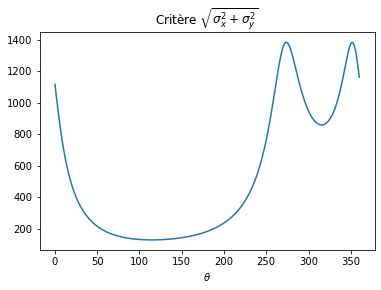

In [9]:
crit = np.zeros((360))
for i in range(360) :
    phi = i*math.pi/180
    X = dynamique_observateur(phi,T,nb_mes,vitesse_observateur)
    Y = dynamique_emmeteur(position_initiale, nb_mes,cap_emmeteur,vitesse_emmeteur)
    valeurs_J = J(X,Y,J_init,simga_mes,inverse)
    cramer_rao = borne_cramer_rao(X,Y,J_init,simga_mes,inverse) 
    critère = np.sqrt(cramer_rao[-1,0]**2+cramer_rao[-1,1]**2)
    crit[i]=critère
absc = np.linspace(0,360,360)
plt.title('Critère $\sqrt{\sigma_x^2 + \sigma_y^2}$ ')
plt.xlabel('$\\theta$')
plt.plot(absc,crit)